<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Province-Data" data-toc-modified-id="Province-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Province Data</a></span></li><li><span><a href="#Italy-Map" data-toc-modified-id="Italy-Map-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Italy Map</a></span></li><li><span><a href="#Lombardia,-ER-and-Veneto" data-toc-modified-id="Lombardia,-ER-and-Veneto-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lombardia, ER and Veneto</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Growth-Rates" data-toc-modified-id="Growth-Rates-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Growth Rates</a></span></li></ul></li><li><span><a href="#Cities-(Lombardia,-ER-and-Veneto)" data-toc-modified-id="Cities-(Lombardia,-ER-and-Veneto)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cities (Lombardia, ER and Veneto)</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Growth-Rates" data-toc-modified-id="Growth-Rates-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Growth Rates</a></span></li></ul></li></ul></div>

In [1]:
import os
import sys
import seaborn as sns
from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from IPython.display import HTML

code = os.path.abspath(os.path.join('..'))
if code not in sys.path:
    sys.path.append(code)
    
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
    
# DATA --> https://github.com/pcm-dpc/COVID-19

In [2]:
from src.dataclass.coviddata import ItalianCovidData
REGIONS = ['Lombardia', 'Emilia-Romagna', 'Veneto']

from src.config import (
    CITIES_LOMBARDIA,
    CITIES_EMILIA,
    CITIES_VENETO,
    CITIES_CAMPANIA
)
WINDOWS = (7,15,30)
DAYS_BACK = 0

# Province Data

In [3]:
covid_data_it = ItalianCovidData()

In [4]:
covid_data_it.data_summary()

--- Latest Update: 2020-10-30 ---


 --- REGIONS DATASET --- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5250 entries, 0 to 5249
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          5250 non-null   datetime64[ns]
 1   stato                         5250 non-null   object        
 2   codice_regione                5250 non-null   int64         
 3   denominazione_regione         5250 non-null   object        
 4   lat                           5250 non-null   float64       
 5   long                          5250 non-null   float64       
 6   ricoverati_con_sintomi        5250 non-null   int64         
 7   terapia_intensiva             5250 non-null   int64         
 8   totale_ospedalizzati          5250 non-null   int64         
 9   isolamento_domiciliare        5250 non-null   int64         
 10  totale_positivi               525

# Italy Map

In [5]:
covid_data_it.set_cities_data_today(day_window=7, days_before=DAYS_BACK)

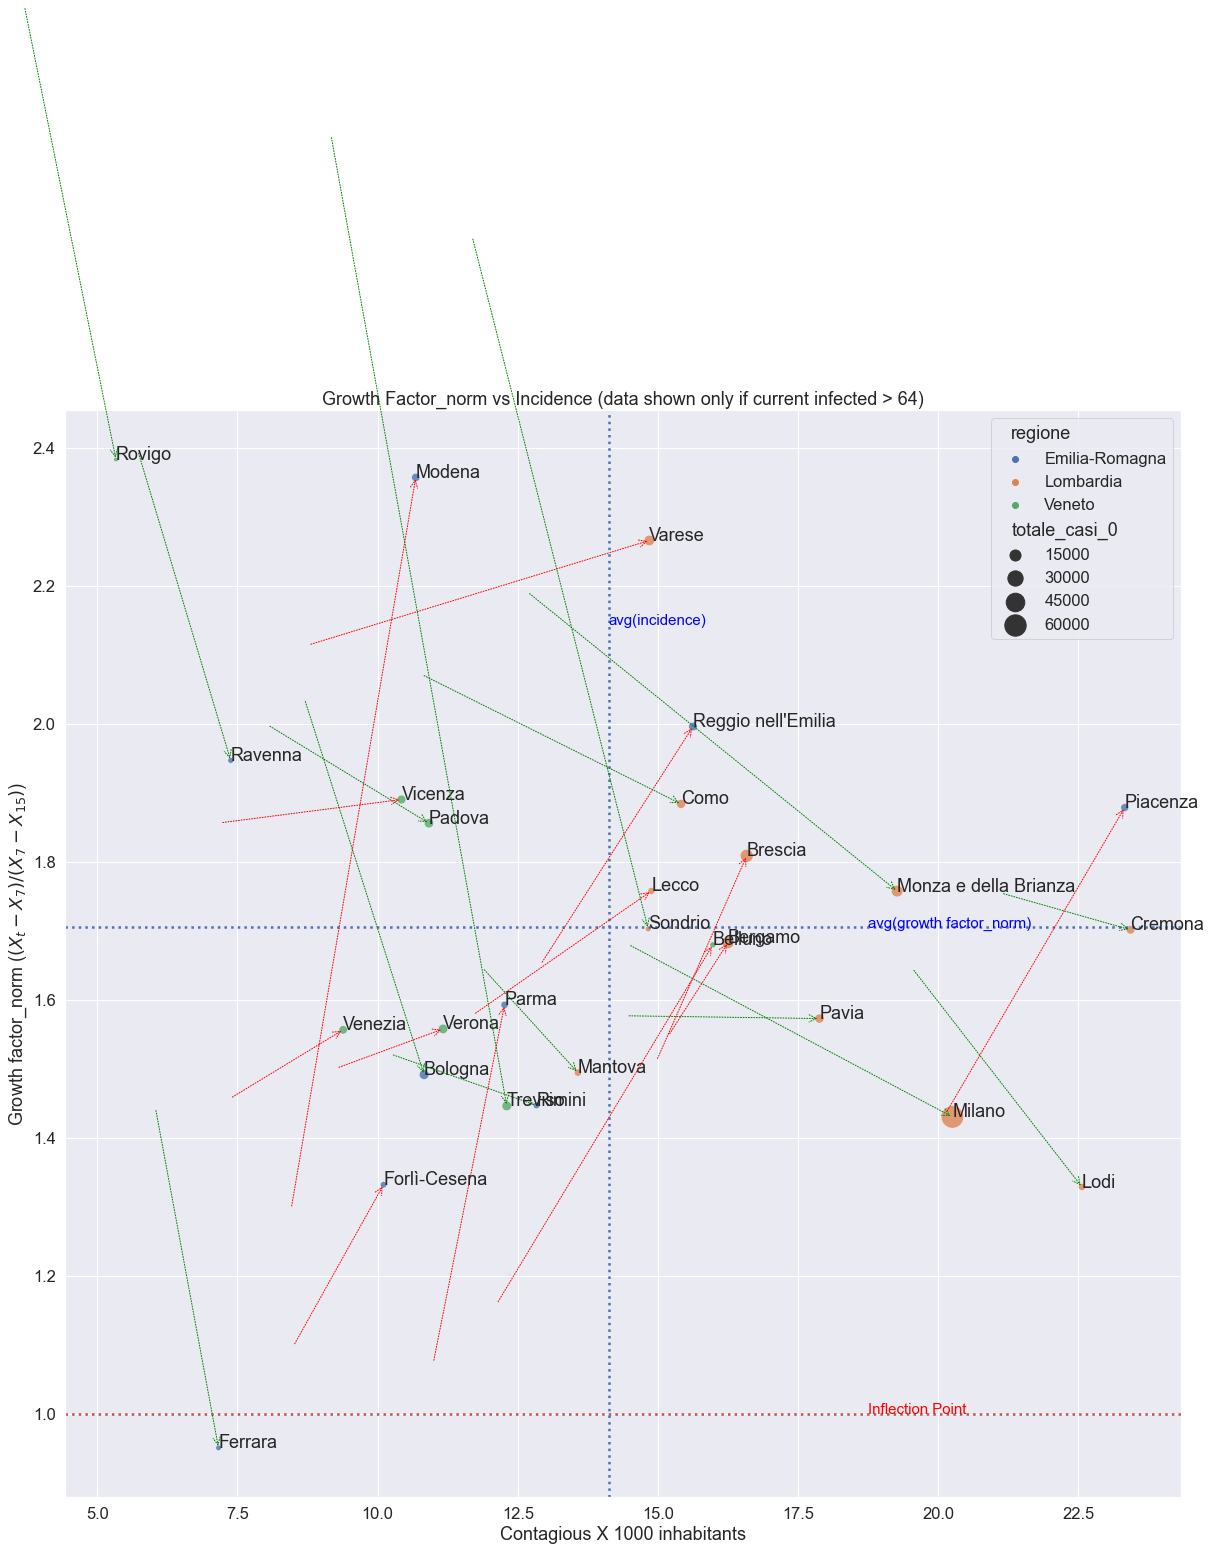

In [6]:
covid_data_it.scatter_gf_incidence(regioni=['Lombardia', 'Emilia-Romagna', 'Veneto'], norm=True)

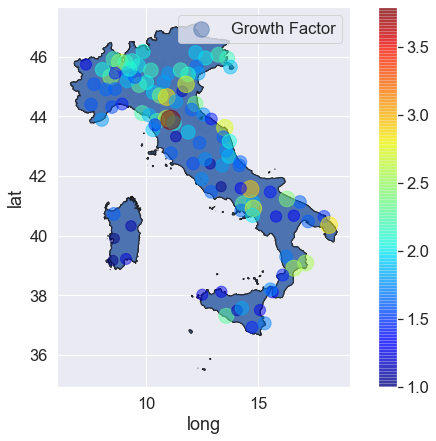

In [7]:
target_date = (date.today() - timedelta(days=DAYS_BACK)).strftime('%Y-%m-%d')
covid_data_it.show_map_cases(current_date=target_date)

# Lombardia, ER and Veneto

## Trend

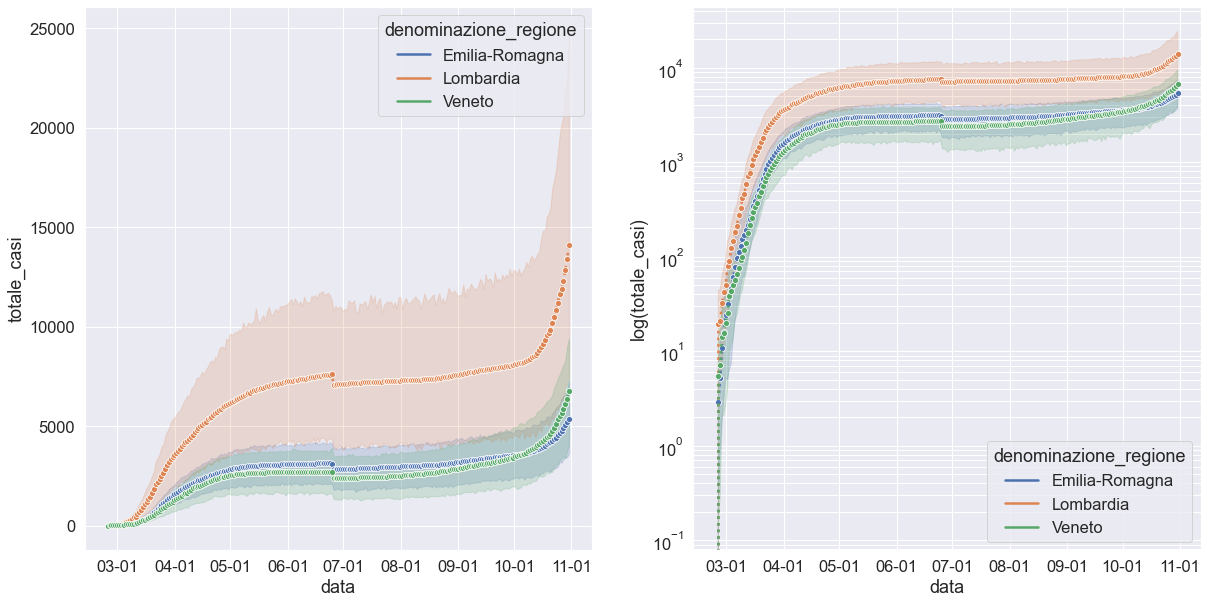

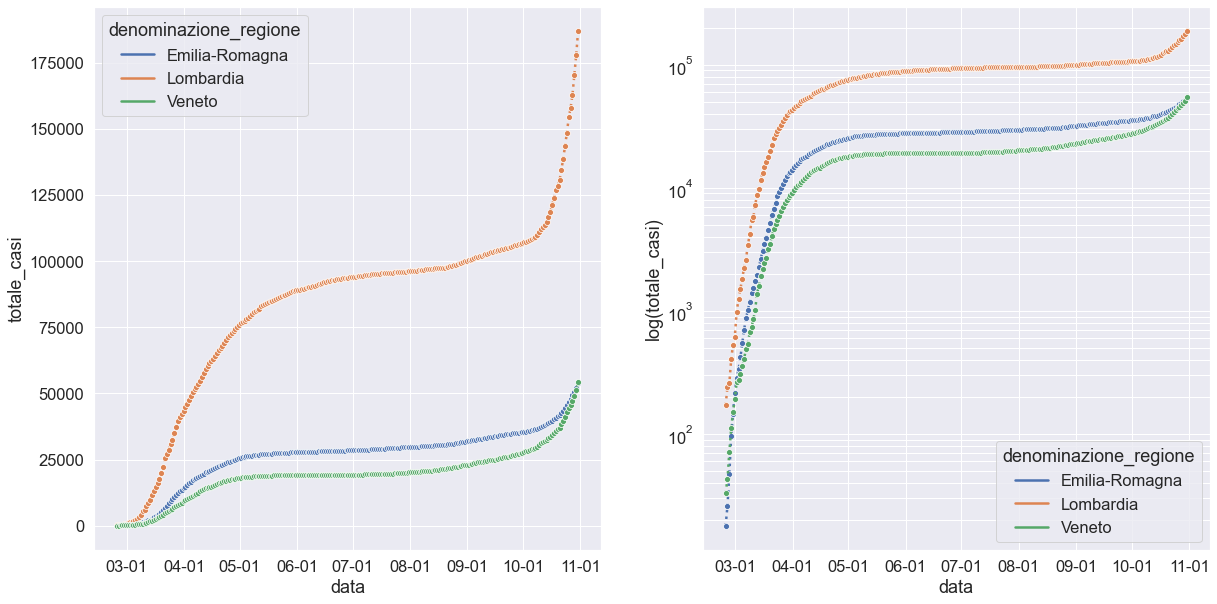

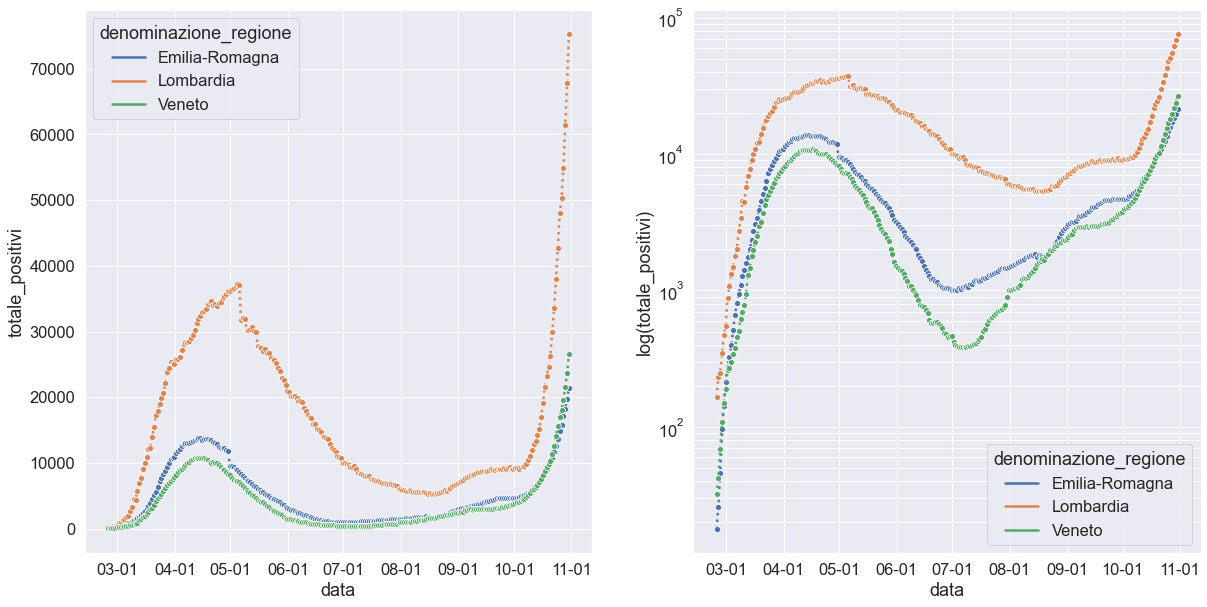

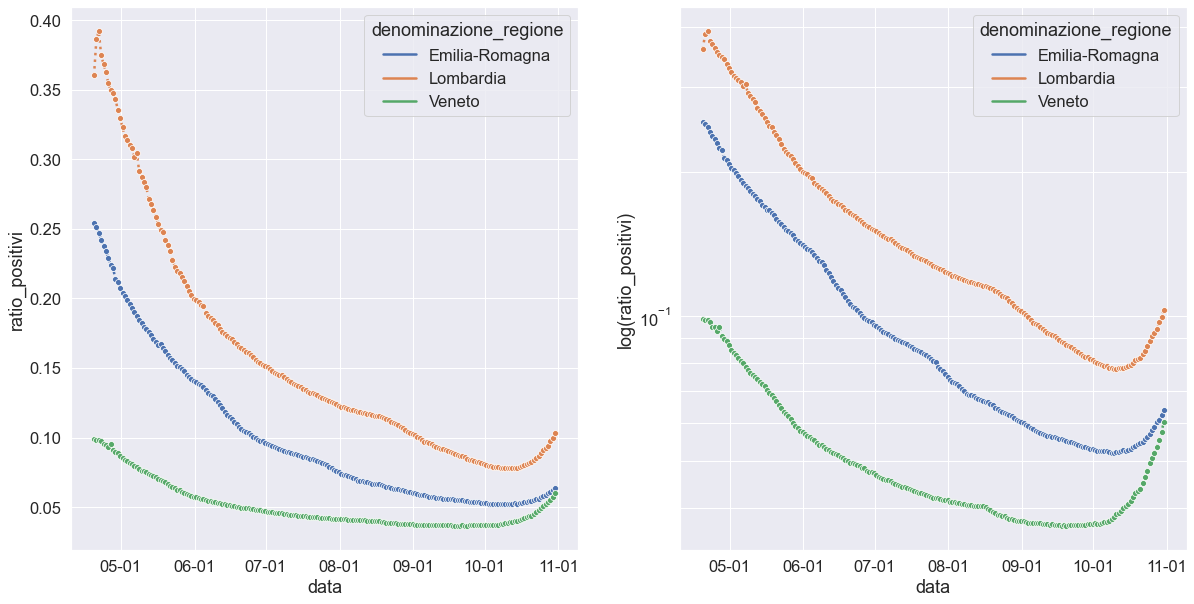

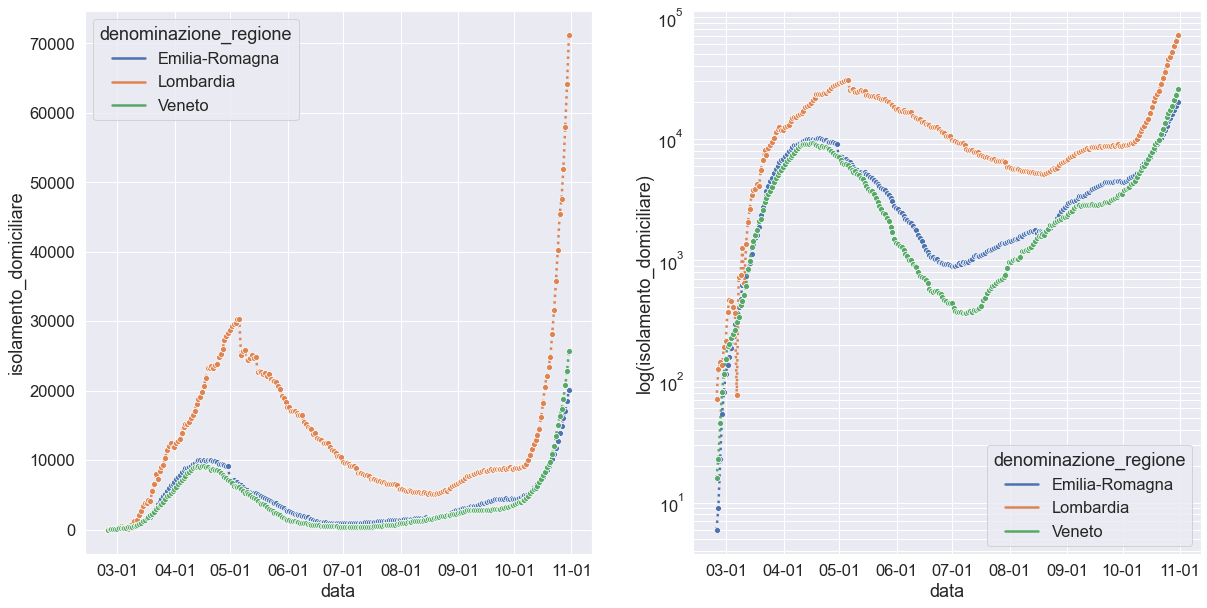

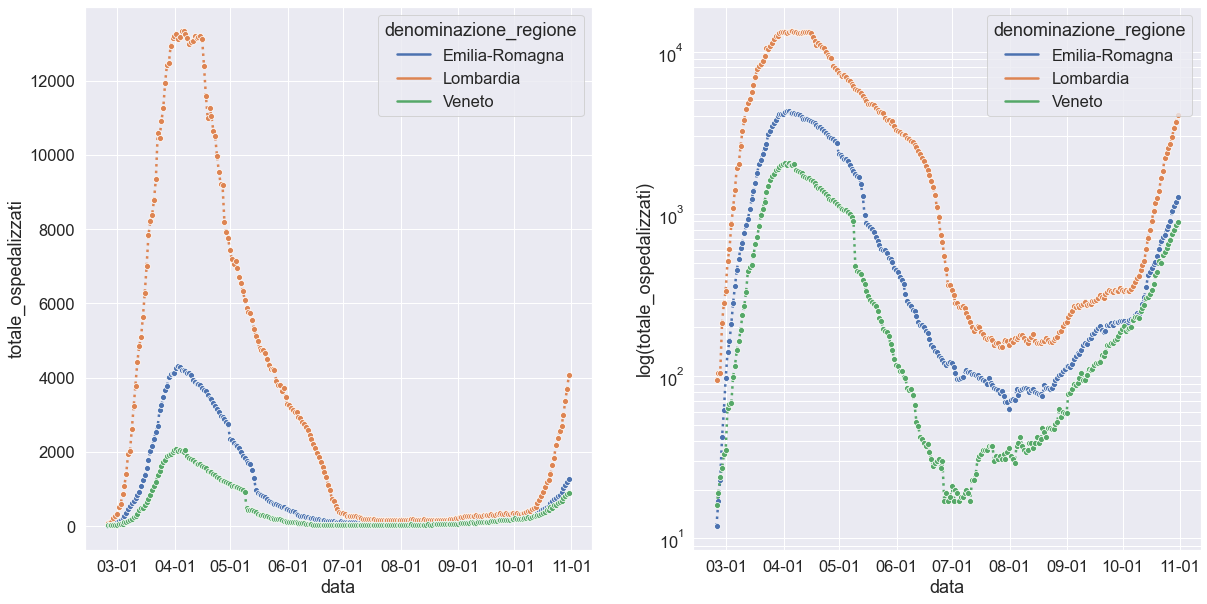

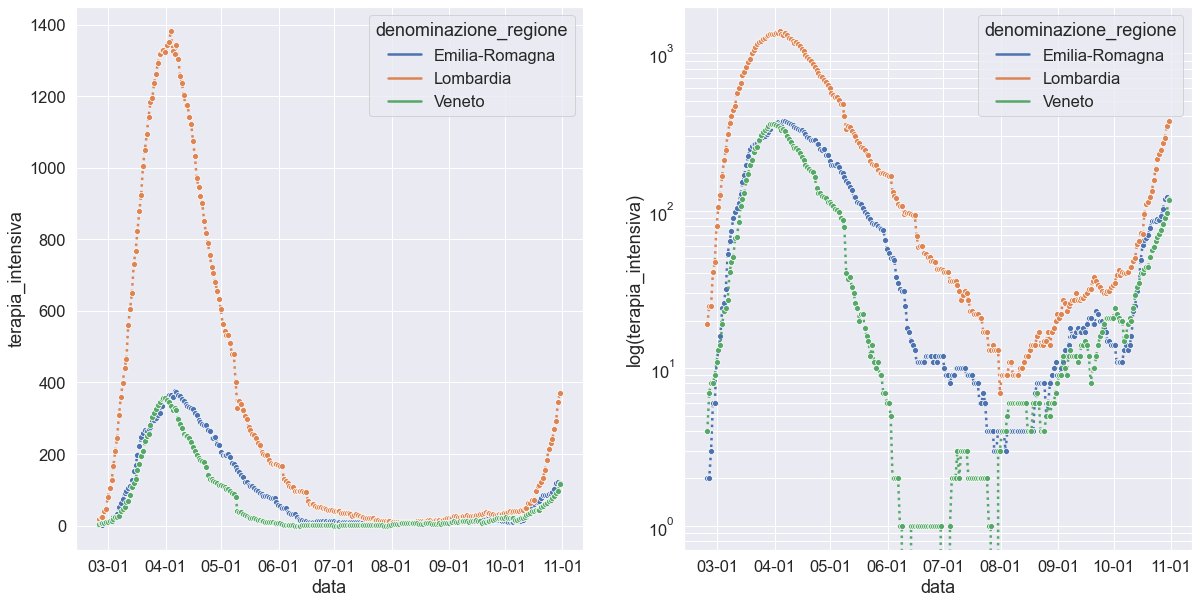

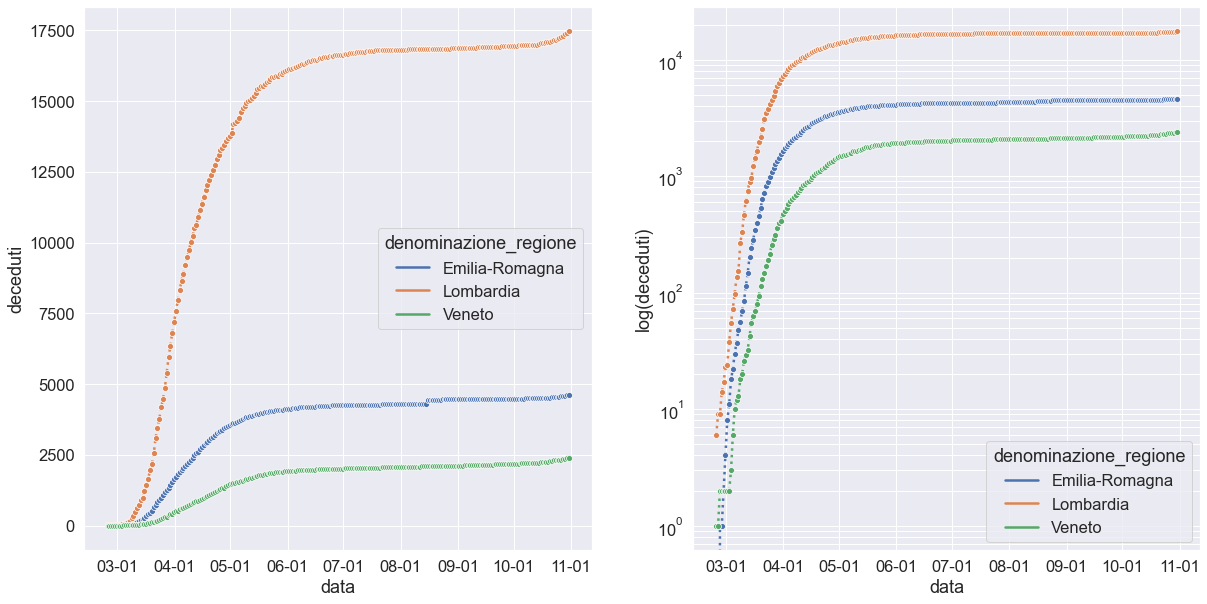

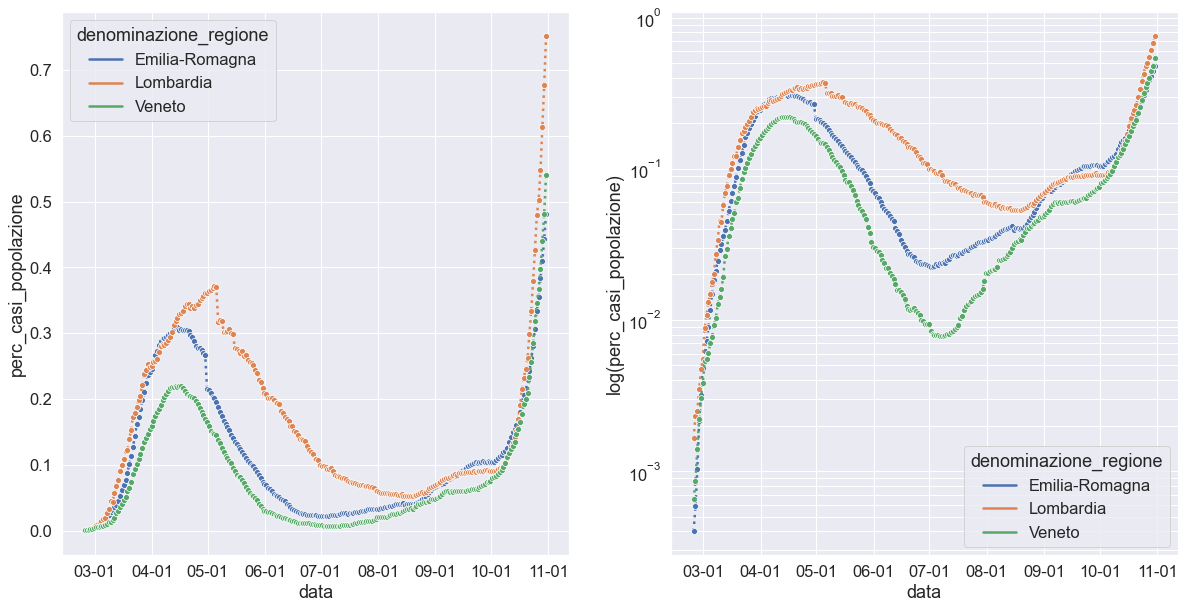

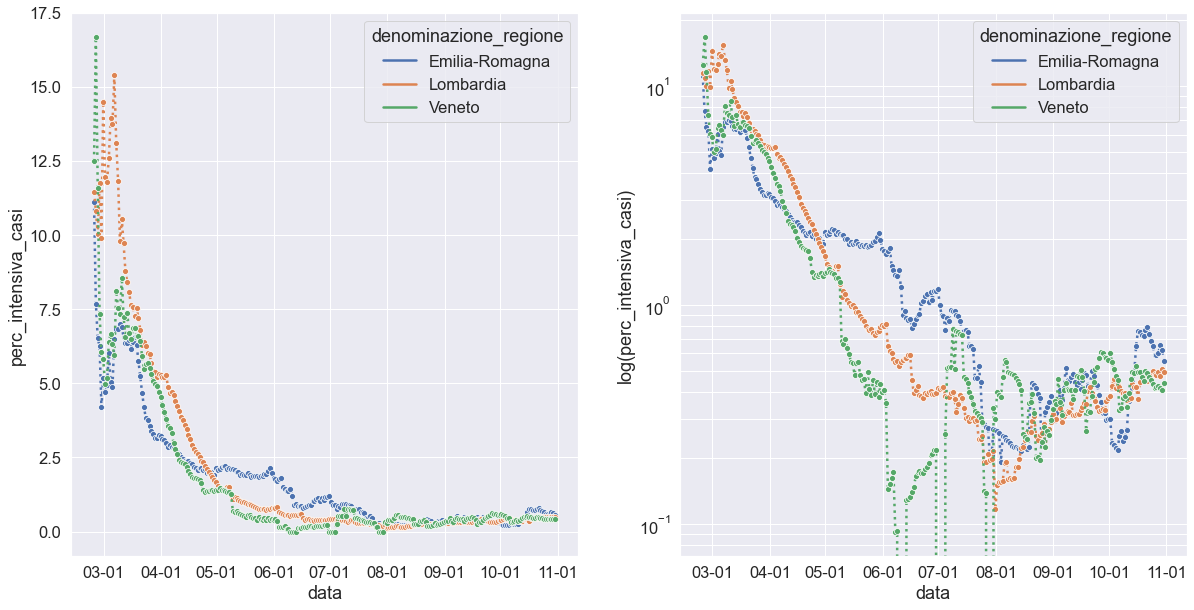

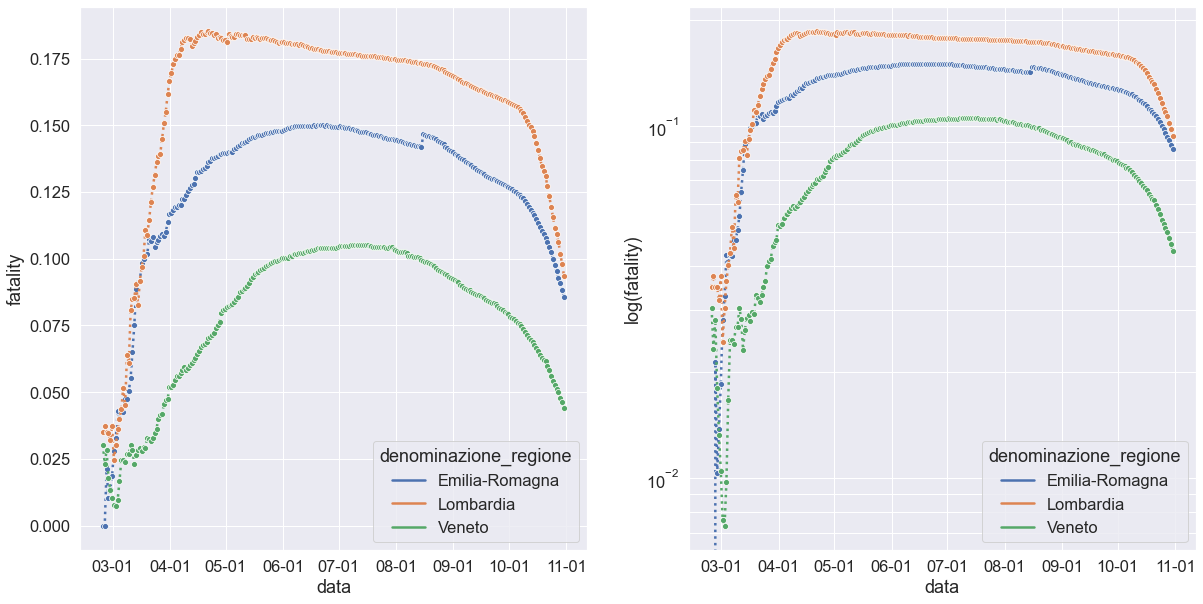

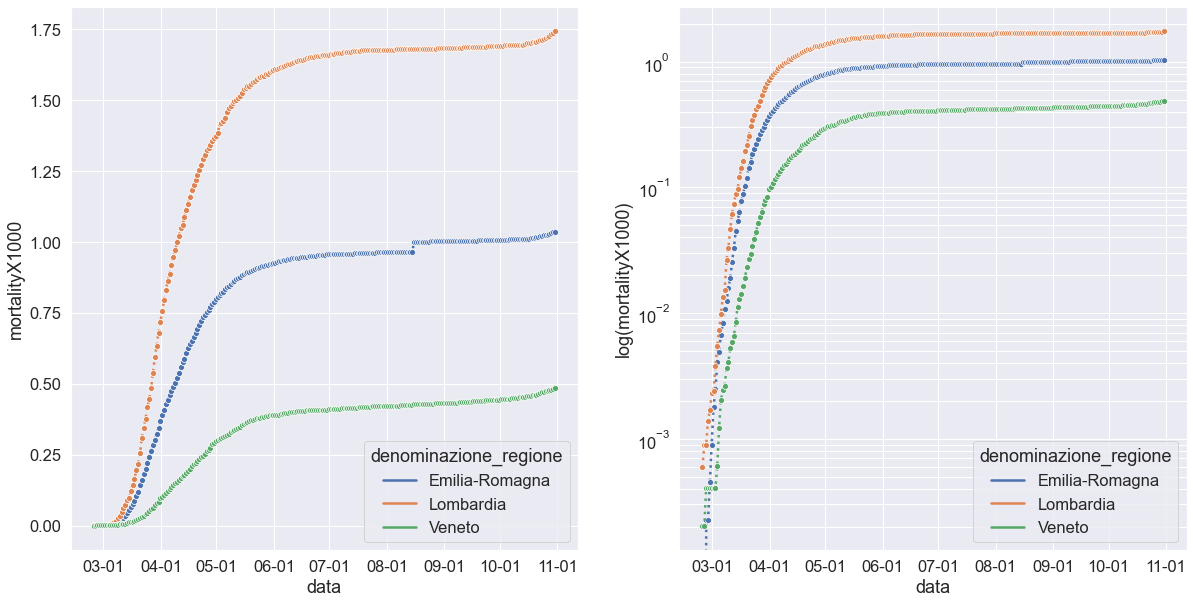

In [8]:
covid_data_it.plot_region_indicators(regions_area=REGIONS)

## Growth Rates

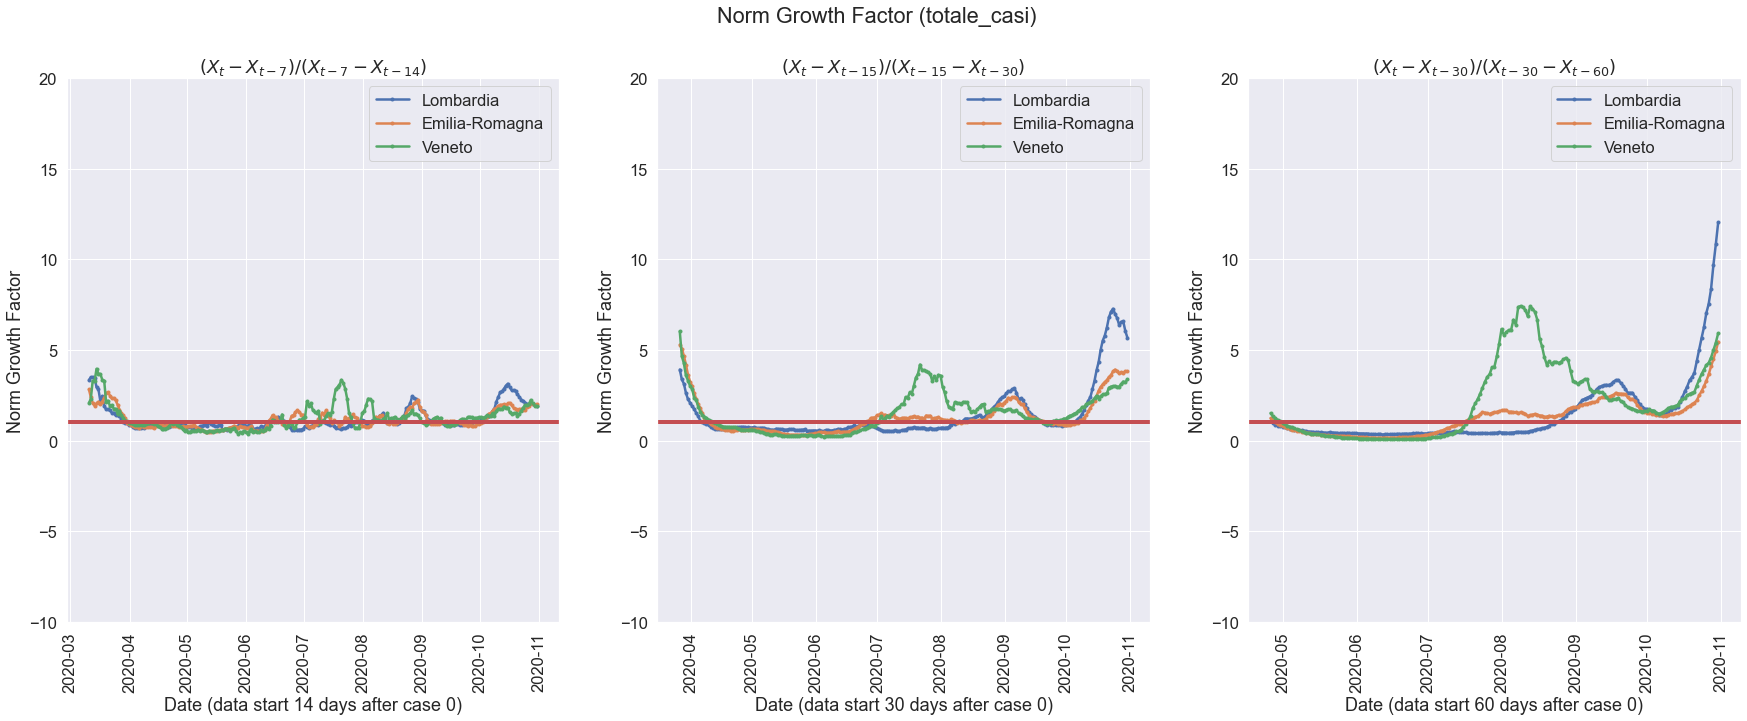

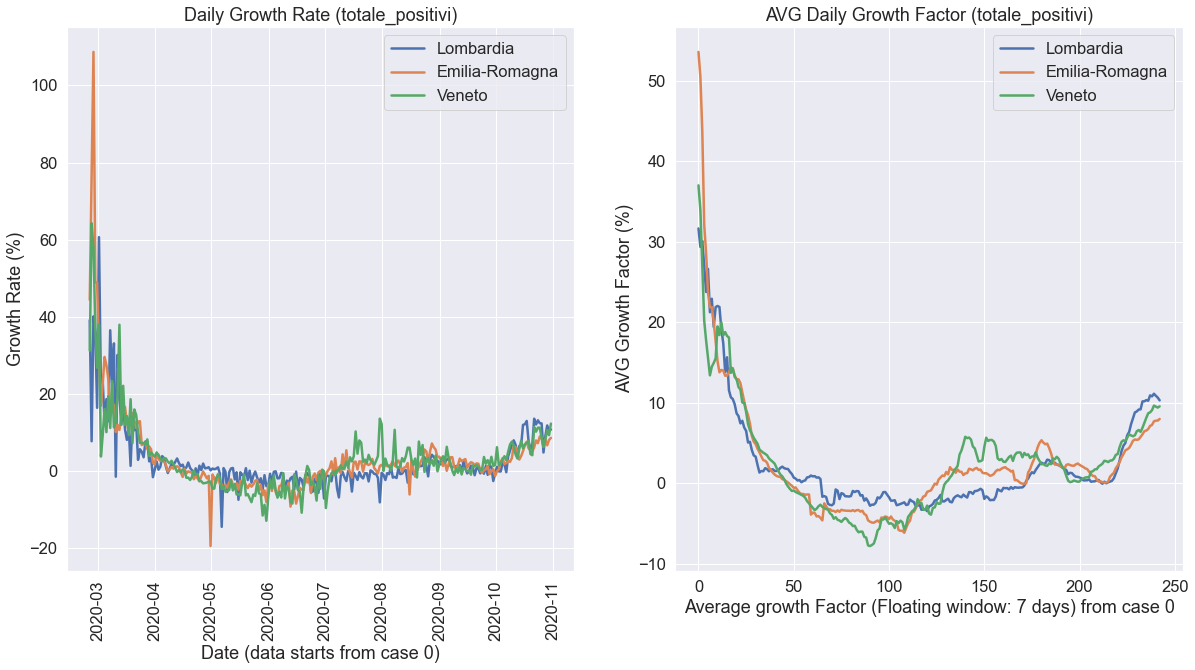

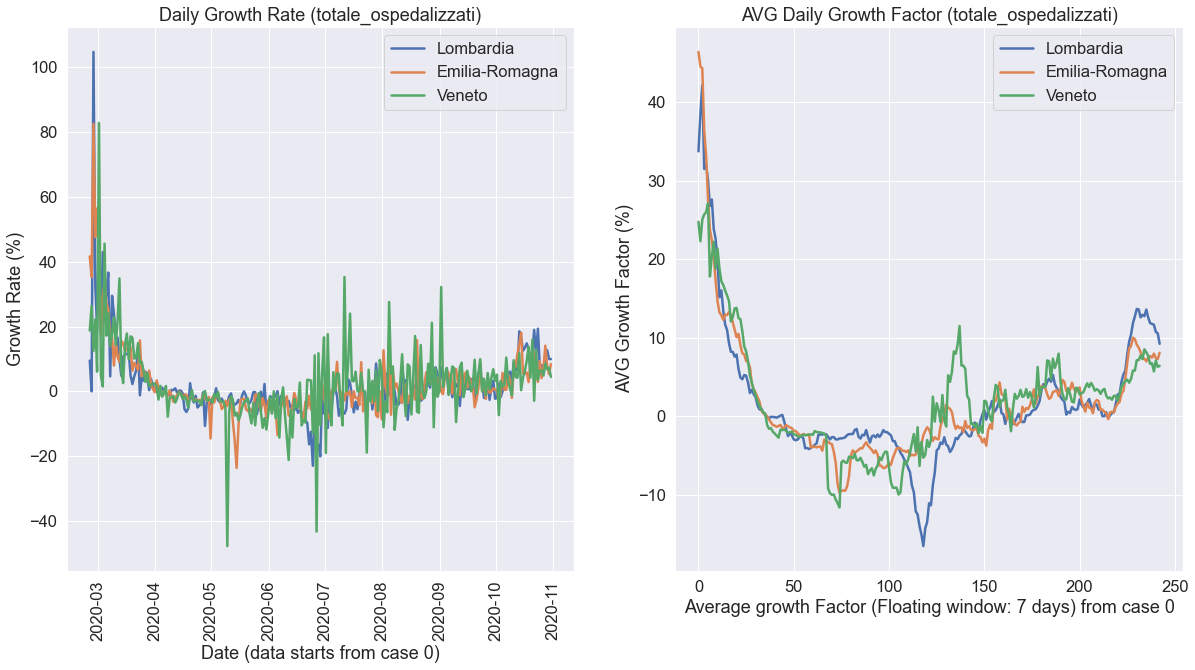

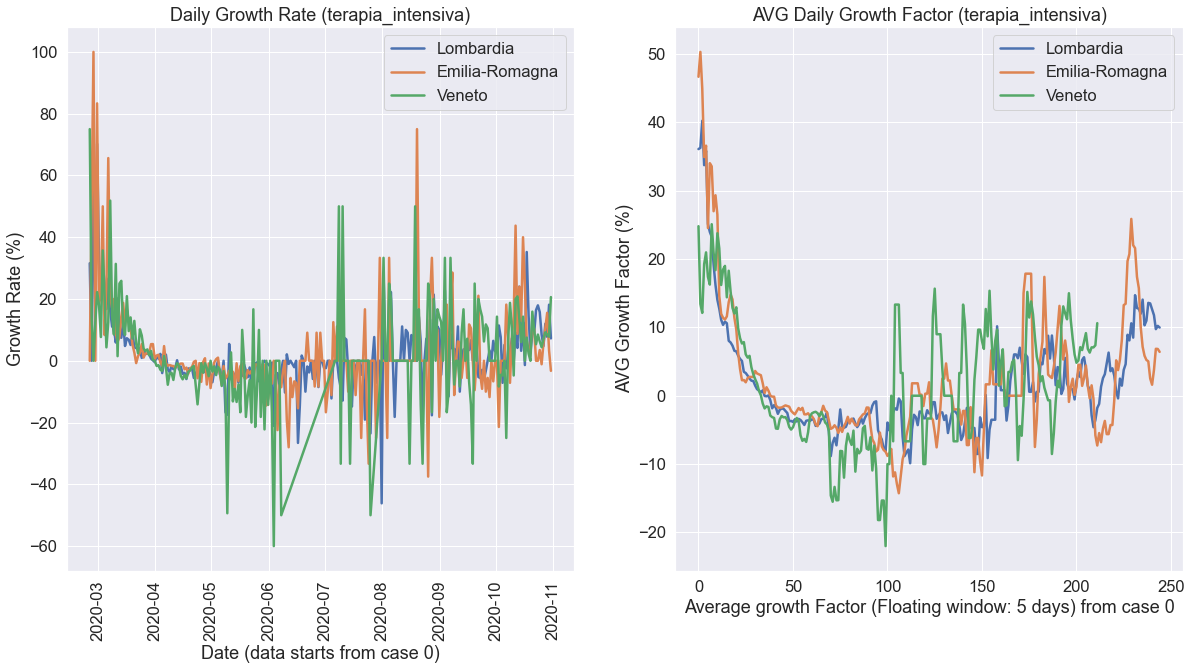

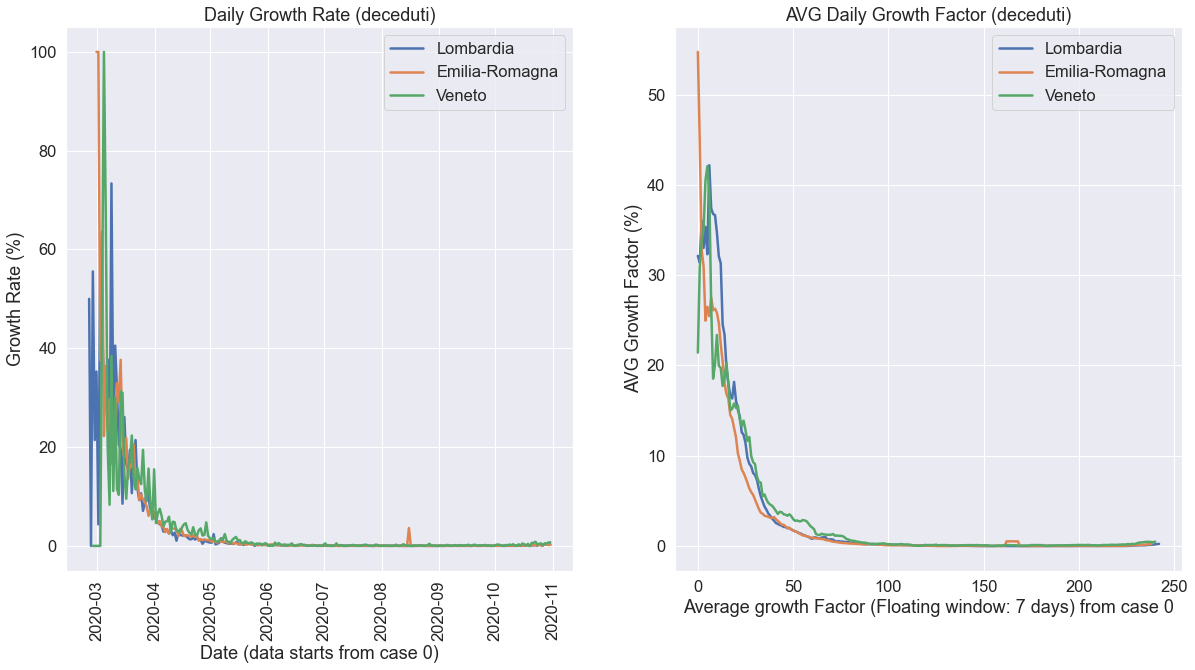

In [9]:
covid_data_it.growth_factors(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator="totale_casi",
                           grw=WINDOWS)
covid_data_it.growth_rates(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator="totale_positivi",
                           grw=7)
covid_data_it.growth_rates(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator="totale_ospedalizzati",
                           grw=7)
covid_data_it.growth_rates(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator='terapia_intensiva',
                           grw=5)
covid_data_it.growth_rates(areas=REGIONS,
                           regions=True,
                           area_target='denominazione_regione',
                           indicator="deceduti",
                           grw=7)

# Cities (Lombardia, ER and Veneto)

## Growth Rates

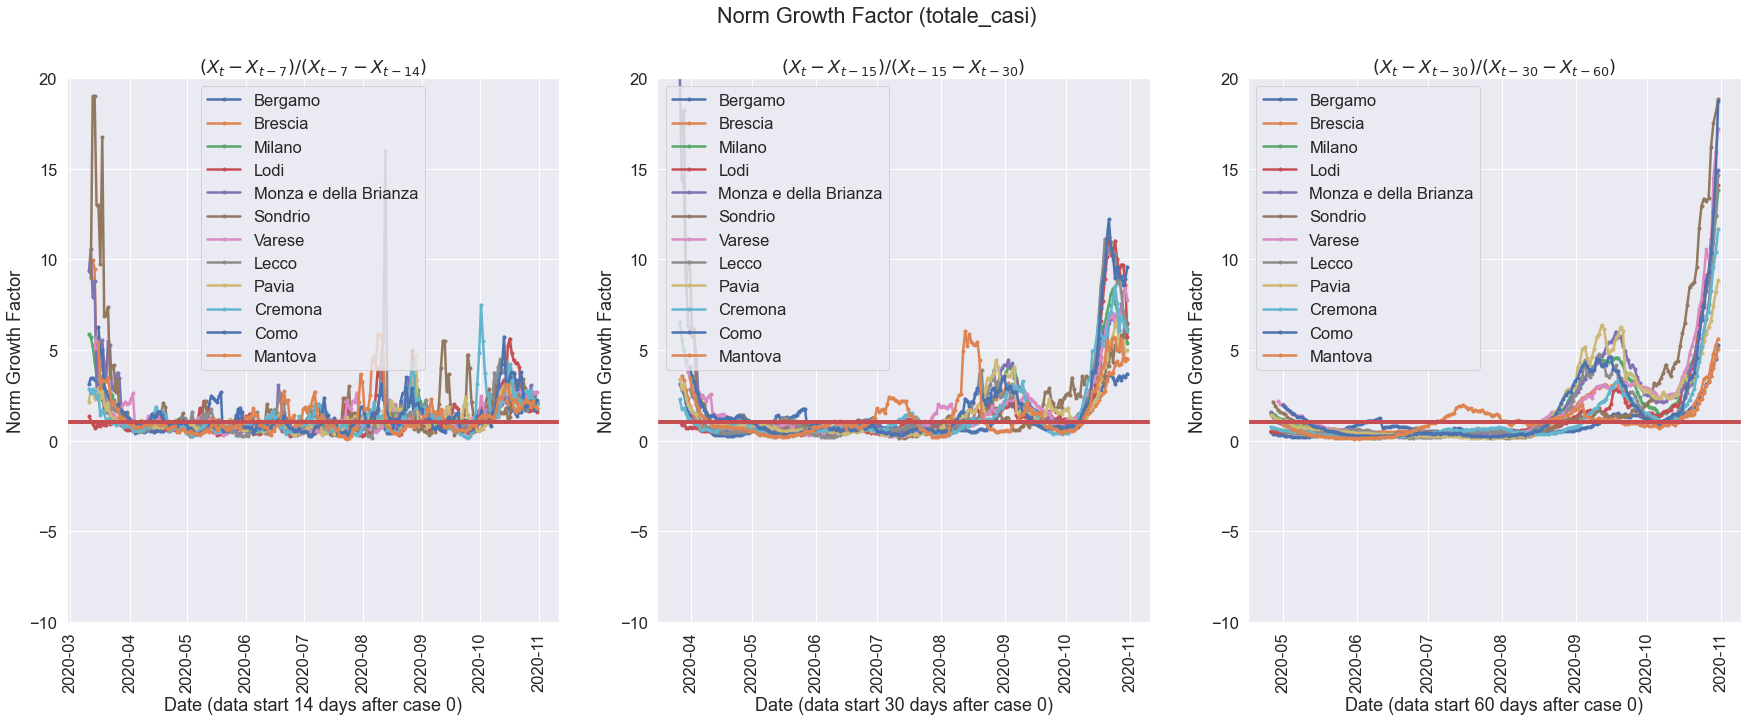

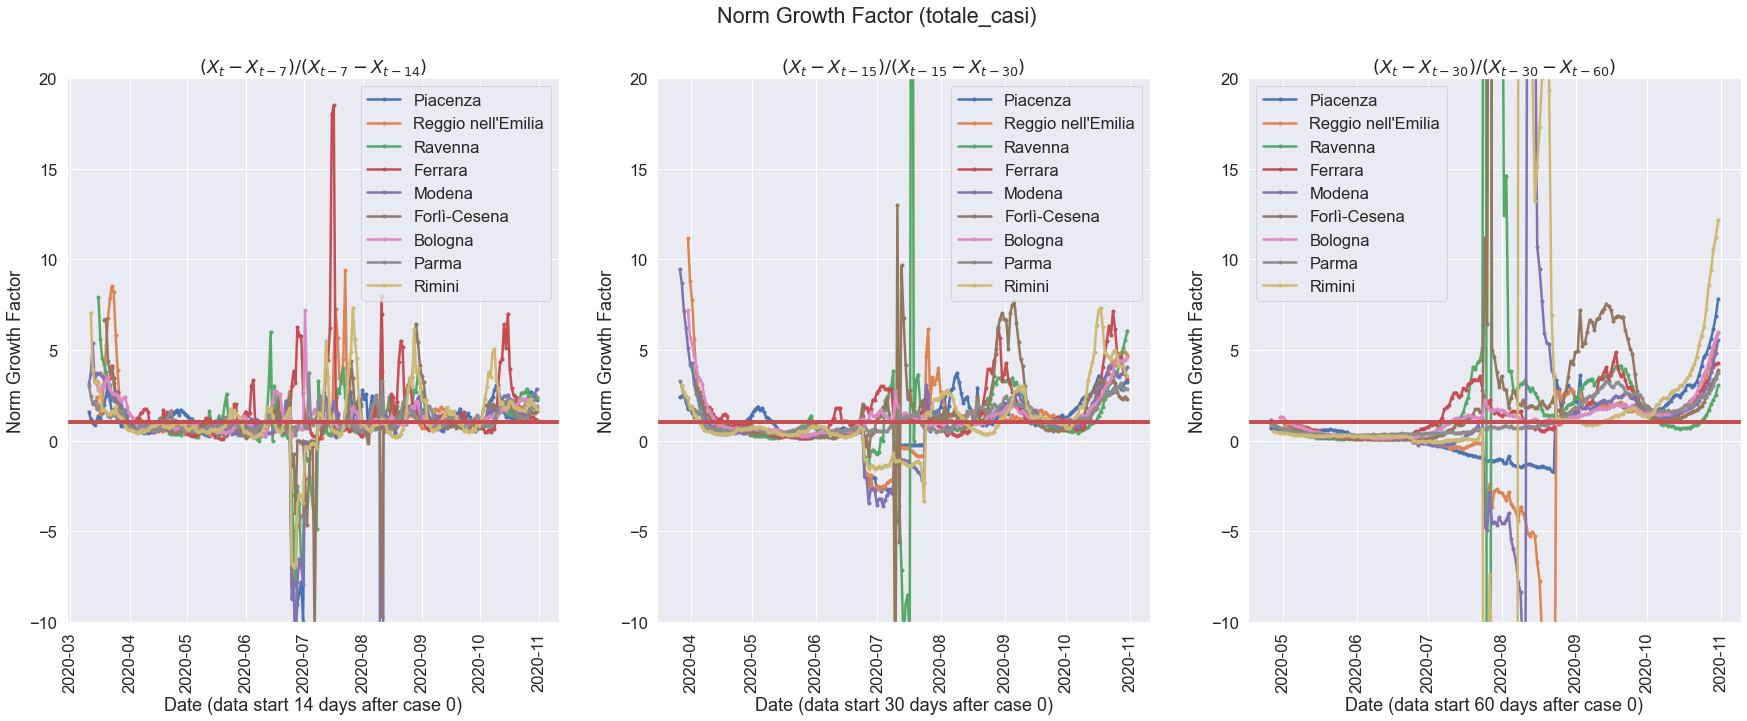

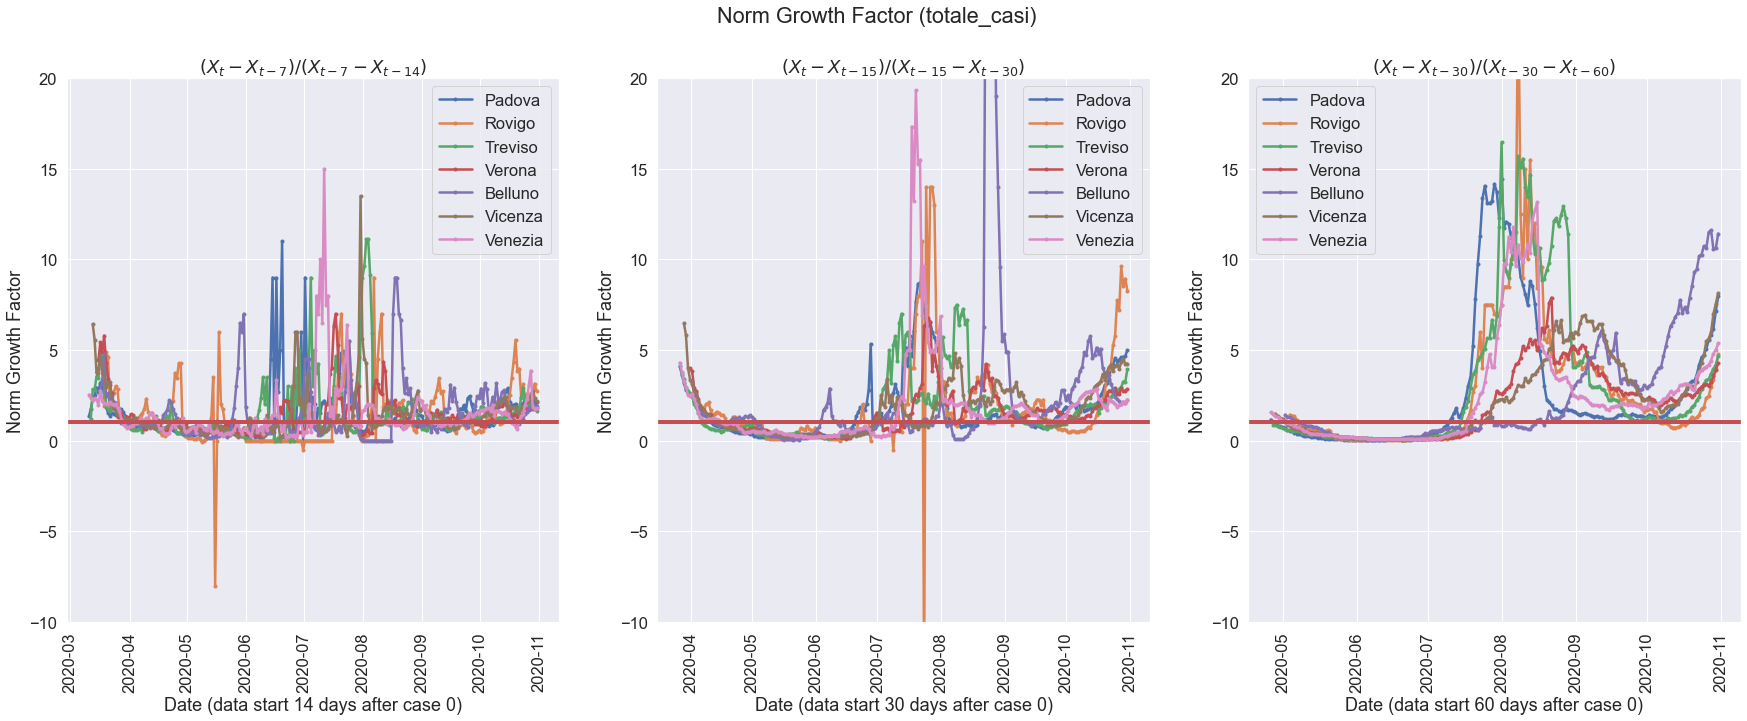

In [10]:
covid_data_it.growth_factors(areas=CITIES_LOMBARDIA,
                           regions=False,
                           area_target='denominazione_provincia',
                           indicator='totale_casi',
                           grw=WINDOWS)
covid_data_it.growth_factors(areas=CITIES_EMILIA,
                           regions=False,
                           area_target='denominazione_provincia',
                           indicator='totale_casi',
                           grw=WINDOWS)
covid_data_it.growth_factors(areas=CITIES_VENETO,
                           regions=False,
                           area_target='denominazione_provincia',
                           indicator='totale_casi',
                           grw=WINDOWS)